[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/14_Activation_Functions_Regression_Complex_data.ipynb)

# 14 Comparison of Activation Functions Using Regression


In [2]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv

--2018-06-21 13:09:23--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14378532 (14M) [text/plain]
Saving to: ‘FFS_01433.csv’

FFS_01433.csv       100%[===================>]  13.71M  39.8MB/s    in 0.3s    

2018-06-21 13:09:23 (39.8 MB/s) - ‘FFS_01433.csv’ saved [14378532/14378532]



In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers, LeakyReLU, PReLU, regularizers, Dropout
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [5]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [6]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


In [0]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [8]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,0.84,1.00,0.27,0.11,0.21,0.32,0.92,0.53,0.47,0.52,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
1,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
2,0.37,0.64,0.55,0.13,0.37,0.85,0.69,0.00,0.11,0.09,...,0.55,0.33,0.19,0.11,0.31,0.78,0.49,0.51,0.18,0.00
3,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.23,0.12,0.26,0.23,0.32,0.75,0.05,0.29,0.43,0.00
4,0.76,0.42,0.00,0.31,0.32,0.22,0.78,0.54,0.45,0.35,...,0.57,0.39,1.00,0.16,1.00,0.58,0.70,0.00,0.79,0.00


In [9]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


##  1. Using Sigmoid Function

In [0]:
epochs = 100
batch_size = 256

In [11]:
model_1 = Sequential()
model_1.add(Dense(64, input_shape=(X.shape[1],), activation='sigmoid'))
model_1.add(Dense(32, activation='sigmoid'))
model_1.add(Dense(16, activation='sigmoid'))
model_1.add(Dense(8, activation='sigmoid'))
model_1.add(Dense(1))
  
model_1.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))


Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.4183 - mean_absolute_error: 0.5060 - val_loss: 0.0362 - val_mean_absolute_error: 0.1555
Epoch 2/100
 - 0s - loss: 0.0312 - mean_absolute_error: 0.1451 - val_loss: 0.0314 - val_mean_absolute_error: 0.1460
Epoch 3/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1440 - val_loss: 0.0314 - val_mean_absolute_error: 0.1460
Epoch 4/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1440 - val_loss: 0.0314 - val_mean_absolute_error: 0.1460
Epoch 5/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1439 - val_loss: 0.0314 - val_mean_absolute_error: 0.1459
Epoch 6/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1439 - val_loss: 0.0313 - val_mean_absolute_error: 0.1459
Epoch 7/100
 - 0s - loss: 0.0306 - mean_absolute_error: 0.1439 - val_loss: 0.0313 - val_mean_absolute_error: 0.1459
Epoch 8/100
 - 0s - loss: 0.0305 - mean_absolute_error: 0.1438 - val_loss: 0.0313 - val_mean_absolute_error: 0.1458
Epoch 9/100
 - 0s - lo

 - 0s - loss: 0.0147 - mean_absolute_error: 0.0970 - val_loss: 0.0151 - val_mean_absolute_error: 0.0987
Epoch 30/100
 - 0s - loss: 0.0146 - mean_absolute_error: 0.0968 - val_loss: 0.0151 - val_mean_absolute_error: 0.0984
Epoch 31/100
 - 0s - loss: 0.0146 - mean_absolute_error: 0.0966 - val_loss: 0.0150 - val_mean_absolute_error: 0.0983
Epoch 32/100
 - 0s - loss: 0.0145 - mean_absolute_error: 0.0963 - val_loss: 0.0149 - val_mean_absolute_error: 0.0979
Epoch 33/100
 - 0s - loss: 0.0144 - mean_absolute_error: 0.0961 - val_loss: 0.0152 - val_mean_absolute_error: 0.0990
Epoch 34/100
 - 0s - loss: 0.0144 - mean_absolute_error: 0.0962 - val_loss: 0.0148 - val_mean_absolute_error: 0.0975
Epoch 35/100
 - 0s - loss: 0.0143 - mean_absolute_error: 0.0958 - val_loss: 0.0147 - val_mean_absolute_error: 0.0973
Epoch 36/100
 - 0s - loss: 0.0143 - mean_absolute_error: 0.0956 - val_loss: 0.0147 - val_mean_absolute_error: 0.0974
Epoch 37/100
 - 0s - loss: 0.0142 - mean_absolute_error: 0.0954 - val_loss: 0

Epoch 58/100
 - 0s - loss: 0.0126 - mean_absolute_error: 0.0899 - val_loss: 0.0130 - val_mean_absolute_error: 0.0919
Epoch 59/100
 - 0s - loss: 0.0125 - mean_absolute_error: 0.0897 - val_loss: 0.0129 - val_mean_absolute_error: 0.0909
Epoch 60/100
 - 0s - loss: 0.0125 - mean_absolute_error: 0.0896 - val_loss: 0.0128 - val_mean_absolute_error: 0.0905
Epoch 61/100
 - 0s - loss: 0.0125 - mean_absolute_error: 0.0896 - val_loss: 0.0128 - val_mean_absolute_error: 0.0905
Epoch 62/100
 - 0s - loss: 0.0124 - mean_absolute_error: 0.0891 - val_loss: 0.0127 - val_mean_absolute_error: 0.0902
Epoch 63/100
 - 0s - loss: 0.0123 - mean_absolute_error: 0.0890 - val_loss: 0.0126 - val_mean_absolute_error: 0.0902
Epoch 64/100
 - 0s - loss: 0.0123 - mean_absolute_error: 0.0888 - val_loss: 0.0126 - val_mean_absolute_error: 0.0899
Epoch 65/100
 - 0s - loss: 0.0122 - mean_absolute_error: 0.0886 - val_loss: 0.0125 - val_mean_absolute_error: 0.0897
Epoch 66/100
 - 0s - loss: 0.0122 - mean_absolute_error: 0.0883 

Epoch 87/100
 - 0s - loss: 0.0116 - mean_absolute_error: 0.0859 - val_loss: 0.0118 - val_mean_absolute_error: 0.0868
Epoch 88/100
 - 0s - loss: 0.0114 - mean_absolute_error: 0.0855 - val_loss: 0.0118 - val_mean_absolute_error: 0.0866
Epoch 89/100
 - 0s - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0123 - val_mean_absolute_error: 0.0895
Epoch 90/100
 - 0s - loss: 0.0115 - mean_absolute_error: 0.0856 - val_loss: 0.0118 - val_mean_absolute_error: 0.0873
Epoch 91/100
 - 0s - loss: 0.0114 - mean_absolute_error: 0.0853 - val_loss: 0.0119 - val_mean_absolute_error: 0.0876
Epoch 92/100
 - 0s - loss: 0.0114 - mean_absolute_error: 0.0854 - val_loss: 0.0118 - val_mean_absolute_error: 0.0868
Epoch 93/100
 - 0s - loss: 0.0114 - mean_absolute_error: 0.0852 - val_loss: 0.0117 - val_mean_absolute_error: 0.0866
Epoch 94/100
 - 0s - loss: 0.0113 - mean_absolute_error: 0.0849 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 95/100
 - 0s - loss: 0.0113 - mean_absolute_error: 0.0848 

In [12]:
train_loss_1 = model_1.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))
y_pred_1 = model_1.predict(X_test)
print("Score", r2_score(y_test, y_pred_1))

Training loss  0.011093352183229401
Testing loss 0.011544903256640999
Score 0.632369842621253


## 2. Using Tanh

In [13]:
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X.shape[1],), activation='tanh'))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(16, activation='tanh'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(1))
  
model_2.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0278 - mean_absolute_error: 0.1274 - val_loss: 0.0174 - val_mean_absolute_error: 0.1061
Epoch 2/100
 - 0s - loss: 0.0150 - mean_absolute_error: 0.0981 - val_loss: 0.0146 - val_mean_absolute_error: 0.0971
Epoch 3/100
 - 0s - loss: 0.0139 - mean_absolute_error: 0.0945 - val_loss: 0.0143 - val_mean_absolute_error: 0.0971
Epoch 4/100
 - 0s - loss: 0.0134 - mean_absolute_error: 0.0927 - val_loss: 0.0134 - val_mean_absolute_error: 0.0932
Epoch 5/100
 - 0s - loss: 0.0128 - mean_absolute_error: 0.0909 - val_loss: 0.0131 - val_mean_absolute_error: 0.0921
Epoch 6/100
 - 0s - loss: 0.0127 - mean_absolute_error: 0.0903 - val_loss: 0.0128 - val_mean_absolute_error: 0.0904
Epoch 7/100
 - 0s - loss: 0.0125 - mean_absolute_error: 0.0897 - val_loss: 0.0125 - val_mean_absolute_error: 0.0895
Epoch 8/100
 - 0s - loss: 0.0122 - mean_absolute_error: 0.0885 - val_loss: 0.0125 - val_mean_absolute_error: 0.0896
Epoch 9/100
 - 0s - lo

 - 0s - loss: 0.0100 - mean_absolute_error: 0.0794 - val_loss: 0.0114 - val_mean_absolute_error: 0.0867
Epoch 30/100
 - 0s - loss: 0.0099 - mean_absolute_error: 0.0791 - val_loss: 0.0103 - val_mean_absolute_error: 0.0800
Epoch 31/100
 - 0s - loss: 0.0099 - mean_absolute_error: 0.0790 - val_loss: 0.0102 - val_mean_absolute_error: 0.0792
Epoch 32/100
 - 0s - loss: 0.0099 - mean_absolute_error: 0.0789 - val_loss: 0.0099 - val_mean_absolute_error: 0.0787
Epoch 33/100
 - 0s - loss: 0.0098 - mean_absolute_error: 0.0785 - val_loss: 0.0102 - val_mean_absolute_error: 0.0798
Epoch 34/100
 - 0s - loss: 0.0098 - mean_absolute_error: 0.0787 - val_loss: 0.0102 - val_mean_absolute_error: 0.0794
Epoch 35/100
 - 0s - loss: 0.0097 - mean_absolute_error: 0.0779 - val_loss: 0.0099 - val_mean_absolute_error: 0.0789
Epoch 36/100
 - 0s - loss: 0.0096 - mean_absolute_error: 0.0777 - val_loss: 0.0106 - val_mean_absolute_error: 0.0807
Epoch 37/100
 - 0s - loss: 0.0095 - mean_absolute_error: 0.0774 - val_loss: 0

Epoch 58/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0740 - val_loss: 0.0094 - val_mean_absolute_error: 0.0768
Epoch 59/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0739 - val_loss: 0.0093 - val_mean_absolute_error: 0.0763
Epoch 60/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0739 - val_loss: 0.0093 - val_mean_absolute_error: 0.0753
Epoch 61/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0096 - val_mean_absolute_error: 0.0787
Epoch 62/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0738 - val_loss: 0.0098 - val_mean_absolute_error: 0.0791
Epoch 63/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0092 - val_mean_absolute_error: 0.0762
Epoch 64/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0097 - val_mean_absolute_error: 0.0786
Epoch 65/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0735 - val_loss: 0.0101 - val_mean_absolute_error: 0.0787
Epoch 66/100
 - 0s - loss: 0.0086 - mean_absolute_error: 0.0729 

Epoch 87/100
 - 0s - loss: 0.0082 - mean_absolute_error: 0.0709 - val_loss: 0.0087 - val_mean_absolute_error: 0.0729
Epoch 88/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0706 - val_loss: 0.0087 - val_mean_absolute_error: 0.0726
Epoch 89/100
 - 0s - loss: 0.0080 - mean_absolute_error: 0.0702 - val_loss: 0.0093 - val_mean_absolute_error: 0.0769
Epoch 90/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0708 - val_loss: 0.0087 - val_mean_absolute_error: 0.0738
Epoch 91/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0704 - val_loss: 0.0089 - val_mean_absolute_error: 0.0726
Epoch 92/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0705 - val_loss: 0.0086 - val_mean_absolute_error: 0.0721
Epoch 93/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0704 - val_loss: 0.0087 - val_mean_absolute_error: 0.0731
Epoch 94/100
 - 0s - loss: 0.0080 - mean_absolute_error: 0.0701 - val_loss: 0.0085 - val_mean_absolute_error: 0.0720
Epoch 95/100
 - 0s - loss: 0.0080 - mean_absolute_error: 0.0704 

In [14]:
train_loss_2 = model_2.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))
y_pred_2 = model_2.predict(X_test)
print("Score", r2_score(y_test, y_pred_2))

Training loss  0.008442344557354476
Testing loss 0.009133713176969952
Score 0.7091505790452242


## 3. Using ReLU

In [15]:
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1))
  
model_3.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0405 - mean_absolute_error: 0.1529 - val_loss: 0.0183 - val_mean_absolute_error: 0.1082
Epoch 2/100
 - 0s - loss: 0.0160 - mean_absolute_error: 0.1012 - val_loss: 0.0154 - val_mean_absolute_error: 0.0991
Epoch 3/100
 - 0s - loss: 0.0146 - mean_absolute_error: 0.0968 - val_loss: 0.0145 - val_mean_absolute_error: 0.0962
Epoch 4/100
 - 0s - loss: 0.0137 - mean_absolute_error: 0.0937 - val_loss: 0.0147 - val_mean_absolute_error: 0.0966
Epoch 5/100
 - 0s - loss: 0.0130 - mean_absolute_error: 0.0916 - val_loss: 0.0130 - val_mean_absolute_error: 0.0912
Epoch 6/100
 - 0s - loss: 0.0124 - mean_absolute_error: 0.0896 - val_loss: 0.0128 - val_mean_absolute_error: 0.0899
Epoch 7/100
 - 0s - loss: 0.0120 - mean_absolute_error: 0.0882 - val_loss: 0.0121 - val_mean_absolute_error: 0.0885
Epoch 8/100
 - 0s - loss: 0.0117 - mean_absolute_error: 0.0867 - val_loss: 0.0119 - val_mean_absolute_error: 0.0866
Epoch 9/100
 - 0s - lo

 - 0s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 0.0096 - val_mean_absolute_error: 0.0763
Epoch 30/100
 - 0s - loss: 0.0089 - mean_absolute_error: 0.0743 - val_loss: 0.0104 - val_mean_absolute_error: 0.0785
Epoch 31/100
 - 0s - loss: 0.0090 - mean_absolute_error: 0.0746 - val_loss: 0.0096 - val_mean_absolute_error: 0.0761
Epoch 32/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0738 - val_loss: 0.0095 - val_mean_absolute_error: 0.0777
Epoch 33/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0740 - val_loss: 0.0093 - val_mean_absolute_error: 0.0759
Epoch 34/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0734 - val_loss: 0.0094 - val_mean_absolute_error: 0.0776
Epoch 35/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0731 - val_loss: 0.0102 - val_mean_absolute_error: 0.0778
Epoch 36/100
 - 0s - loss: 0.0087 - mean_absolute_error: 0.0735 - val_loss: 0.0096 - val_mean_absolute_error: 0.0780
Epoch 37/100
 - 0s - loss: 0.0086 - mean_absolute_error: 0.0728 - val_loss: 0

Epoch 58/100
 - 0s - loss: 0.0078 - mean_absolute_error: 0.0689 - val_loss: 0.0087 - val_mean_absolute_error: 0.0731
Epoch 59/100
 - 0s - loss: 0.0078 - mean_absolute_error: 0.0691 - val_loss: 0.0086 - val_mean_absolute_error: 0.0725
Epoch 60/100
 - 0s - loss: 0.0078 - mean_absolute_error: 0.0691 - val_loss: 0.0089 - val_mean_absolute_error: 0.0743
Epoch 61/100
 - 0s - loss: 0.0078 - mean_absolute_error: 0.0689 - val_loss: 0.0086 - val_mean_absolute_error: 0.0718
Epoch 62/100
 - 0s - loss: 0.0077 - mean_absolute_error: 0.0687 - val_loss: 0.0083 - val_mean_absolute_error: 0.0709
Epoch 63/100
 - 0s - loss: 0.0076 - mean_absolute_error: 0.0683 - val_loss: 0.0085 - val_mean_absolute_error: 0.0727
Epoch 64/100
 - 0s - loss: 0.0077 - mean_absolute_error: 0.0684 - val_loss: 0.0086 - val_mean_absolute_error: 0.0716
Epoch 65/100
 - 0s - loss: 0.0077 - mean_absolute_error: 0.0684 - val_loss: 0.0085 - val_mean_absolute_error: 0.0726
Epoch 66/100
 - 0s - loss: 0.0076 - mean_absolute_error: 0.0683 

Epoch 87/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0661 - val_loss: 0.0081 - val_mean_absolute_error: 0.0700
Epoch 88/100
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0658 - val_loss: 0.0081 - val_mean_absolute_error: 0.0702
Epoch 89/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0659 - val_loss: 0.0083 - val_mean_absolute_error: 0.0710
Epoch 90/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0659 - val_loss: 0.0080 - val_mean_absolute_error: 0.0694
Epoch 91/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0659 - val_loss: 0.0081 - val_mean_absolute_error: 0.0695
Epoch 92/100
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0657 - val_loss: 0.0080 - val_mean_absolute_error: 0.0699
Epoch 93/100
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0655 - val_loss: 0.0080 - val_mean_absolute_error: 0.0694
Epoch 94/100
 - 0s - loss: 0.0070 - mean_absolute_error: 0.0652 - val_loss: 0.0079 - val_mean_absolute_error: 0.0691
Epoch 95/100
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0657 

In [16]:
train_loss_3 = model_3.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_3))
test_loss_3 = model_3.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_3))
y_pred_3 = model_3.predict(X_test)
print("Score", r2_score(y_test, y_pred_3))

Training loss  0.006871727526173035
Testing loss 0.007991075061350826
Score 0.7455361798173663


## 4. Using LeakyReLU


In [17]:
model_4 = Sequential()
model_4.add(Dense(64, input_shape=(X.shape[1],)))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(32))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(16))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(8))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(1))
  
model_4.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0303 - mean_absolute_error: 0.1340 - val_loss: 0.0166 - val_mean_absolute_error: 0.1028
Epoch 2/100
 - 1s - loss: 0.0147 - mean_absolute_error: 0.0972 - val_loss: 0.0140 - val_mean_absolute_error: 0.0950
Epoch 3/100
 - 1s - loss: 0.0133 - mean_absolute_error: 0.0924 - val_loss: 0.0145 - val_mean_absolute_error: 0.0972
Epoch 4/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0899 - val_loss: 0.0138 - val_mean_absolute_error: 0.0930
Epoch 5/100
 - 1s - loss: 0.0120 - mean_absolute_error: 0.0876 - val_loss: 0.0120 - val_mean_absolute_error: 0.0878
Epoch 6/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0857 - val_loss: 0.0116 - val_mean_absolute_error: 0.0863
Epoch 7/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0853 - val_loss: 0.0122 - val_mean_absolute_error: 0.0872
Epoch 8/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0837 - val_loss: 0.0119 - val_mean_absolute_error: 0.0880
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0085 - mean_absolute_error: 0.0725 - val_loss: 0.0098 - val_mean_absolute_error: 0.0769
Epoch 30/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0723 - val_loss: 0.0092 - val_mean_absolute_error: 0.0744
Epoch 31/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0725 - val_loss: 0.0095 - val_mean_absolute_error: 0.0777
Epoch 32/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0721 - val_loss: 0.0090 - val_mean_absolute_error: 0.0744
Epoch 33/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0716 - val_loss: 0.0096 - val_mean_absolute_error: 0.0757
Epoch 34/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0714 - val_loss: 0.0095 - val_mean_absolute_error: 0.0783
Epoch 35/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0710 - val_loss: 0.0088 - val_mean_absolute_error: 0.0732
Epoch 36/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0711 - val_loss: 0.0089 - val_mean_absolute_error: 0.0736
Epoch 37/100
 - 1s - loss: 0.0081 - mean_absolute_error: 0.0704 - val_loss: 0

Epoch 58/100
 - 0s - loss: 0.0073 - mean_absolute_error: 0.0667 - val_loss: 0.0083 - val_mean_absolute_error: 0.0708
Epoch 59/100
 - 0s - loss: 0.0073 - mean_absolute_error: 0.0666 - val_loss: 0.0082 - val_mean_absolute_error: 0.0704
Epoch 60/100
 - 0s - loss: 0.0074 - mean_absolute_error: 0.0669 - val_loss: 0.0085 - val_mean_absolute_error: 0.0733
Epoch 61/100
 - 0s - loss: 0.0074 - mean_absolute_error: 0.0667 - val_loss: 0.0083 - val_mean_absolute_error: 0.0713
Epoch 62/100
 - 0s - loss: 0.0073 - mean_absolute_error: 0.0662 - val_loss: 0.0085 - val_mean_absolute_error: 0.0708
Epoch 63/100
 - 0s - loss: 0.0073 - mean_absolute_error: 0.0666 - val_loss: 0.0088 - val_mean_absolute_error: 0.0741
Epoch 64/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0660 - val_loss: 0.0083 - val_mean_absolute_error: 0.0700
Epoch 65/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0660 - val_loss: 0.0084 - val_mean_absolute_error: 0.0704
Epoch 66/100
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0655 

Epoch 87/100
 - 0s - loss: 0.0069 - mean_absolute_error: 0.0642 - val_loss: 0.0080 - val_mean_absolute_error: 0.0692
Epoch 88/100
 - 0s - loss: 0.0068 - mean_absolute_error: 0.0640 - val_loss: 0.0080 - val_mean_absolute_error: 0.0696
Epoch 89/100
 - 0s - loss: 0.0069 - mean_absolute_error: 0.0642 - val_loss: 0.0080 - val_mean_absolute_error: 0.0693
Epoch 90/100
 - 0s - loss: 0.0068 - mean_absolute_error: 0.0641 - val_loss: 0.0080 - val_mean_absolute_error: 0.0689
Epoch 91/100
 - 0s - loss: 0.0068 - mean_absolute_error: 0.0638 - val_loss: 0.0079 - val_mean_absolute_error: 0.0686
Epoch 92/100
 - 0s - loss: 0.0067 - mean_absolute_error: 0.0636 - val_loss: 0.0082 - val_mean_absolute_error: 0.0695
Epoch 93/100
 - 0s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0080 - val_mean_absolute_error: 0.0702
Epoch 94/100
 - 0s - loss: 0.0067 - mean_absolute_error: 0.0636 - val_loss: 0.0079 - val_mean_absolute_error: 0.0691
Epoch 95/100
 - 0s - loss: 0.0067 - mean_absolute_error: 0.0635 

In [18]:
train_loss_4 = model_4.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_4.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))
y_pred_4 = model_4.predict(X_test)
print("Score",r2_score(y_test, y_pred_4))

Training loss  0.006461355669662519
Testing loss 0.007877373489235114
Score 0.749156837605649


## 5. Using PReLU

In [19]:
model_5 = Sequential()
model_5.add(Dense(64, input_shape=(X.shape[1],)))
model_5.add(PReLU())
model_5.add(Dense(32))
model_5.add(PReLU())
model_5.add(Dense(16))
model_5.add(PReLU())
model_5.add(Dense(8))
model_5.add(PReLU())
model_5.add(Dense(1))
  
model_5.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0248 - mean_absolute_error: 0.1229 - val_loss: 0.0162 - val_mean_absolute_error: 0.1017
Epoch 2/100
 - 1s - loss: 0.0146 - mean_absolute_error: 0.0966 - val_loss: 0.0146 - val_mean_absolute_error: 0.0969
Epoch 3/100
 - 1s - loss: 0.0134 - mean_absolute_error: 0.0927 - val_loss: 0.0133 - val_mean_absolute_error: 0.0919
Epoch 4/100
 - 1s - loss: 0.0125 - mean_absolute_error: 0.0891 - val_loss: 0.0128 - val_mean_absolute_error: 0.0900
Epoch 5/100
 - 1s - loss: 0.0118 - mean_absolute_error: 0.0865 - val_loss: 0.0118 - val_mean_absolute_error: 0.0871
Epoch 6/100
 - 1s - loss: 0.0114 - mean_absolute_error: 0.0850 - val_loss: 0.0116 - val_mean_absolute_error: 0.0856
Epoch 7/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0836 - val_loss: 0.0115 - val_mean_absolute_error: 0.0865
Epoch 8/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0828 - val_loss: 0.0110 - val_mean_absolute_error: 0.0826
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0082 - mean_absolute_error: 0.0712 - val_loss: 0.0090 - val_mean_absolute_error: 0.0744
Epoch 30/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0715 - val_loss: 0.0101 - val_mean_absolute_error: 0.0814
Epoch 31/100
 - 1s - loss: 0.0082 - mean_absolute_error: 0.0712 - val_loss: 0.0092 - val_mean_absolute_error: 0.0741
Epoch 32/100
 - 1s - loss: 0.0081 - mean_absolute_error: 0.0707 - val_loss: 0.0095 - val_mean_absolute_error: 0.0745
Epoch 33/100
 - 1s - loss: 0.0081 - mean_absolute_error: 0.0705 - val_loss: 0.0088 - val_mean_absolute_error: 0.0737
Epoch 34/100
 - 1s - loss: 0.0080 - mean_absolute_error: 0.0700 - val_loss: 0.0089 - val_mean_absolute_error: 0.0727
Epoch 35/100
 - 1s - loss: 0.0080 - mean_absolute_error: 0.0700 - val_loss: 0.0087 - val_mean_absolute_error: 0.0722
Epoch 36/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.0698 - val_loss: 0.0107 - val_mean_absolute_error: 0.0835
Epoch 37/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.0695 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0073 - mean_absolute_error: 0.0667 - val_loss: 0.0082 - val_mean_absolute_error: 0.0702
Epoch 59/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0662 - val_loss: 0.0084 - val_mean_absolute_error: 0.0725
Epoch 60/100
 - 1s - loss: 0.0073 - mean_absolute_error: 0.0665 - val_loss: 0.0084 - val_mean_absolute_error: 0.0721
Epoch 61/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0656 - val_loss: 0.0090 - val_mean_absolute_error: 0.0753
Epoch 62/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0662 - val_loss: 0.0084 - val_mean_absolute_error: 0.0701
Epoch 63/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0658 - val_loss: 0.0085 - val_mean_absolute_error: 0.0703
Epoch 64/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0656 - val_loss: 0.0083 - val_mean_absolute_error: 0.0709
Epoch 65/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0653 - val_loss: 0.0082 - val_mean_absolute_error: 0.0704
Epoch 66/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0654 

Epoch 87/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0080 - val_mean_absolute_error: 0.0696
Epoch 88/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0081 - val_mean_absolute_error: 0.0702
Epoch 89/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0632 - val_loss: 0.0081 - val_mean_absolute_error: 0.0684
Epoch 90/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0081 - val_mean_absolute_error: 0.0699
Epoch 91/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0632 - val_loss: 0.0080 - val_mean_absolute_error: 0.0687
Epoch 92/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0631 - val_loss: 0.0080 - val_mean_absolute_error: 0.0688
Epoch 93/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0630 - val_loss: 0.0081 - val_mean_absolute_error: 0.0699
Epoch 94/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0634 - val_loss: 0.0082 - val_mean_absolute_error: 0.0708
Epoch 95/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0632 

In [20]:
train_loss_5 = model_5.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_5))
test_loss_5 = model_5.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_5))
y_pred_5 = model_5.predict(X_test)
print("Score",r2_score(y_test, y_pred_5))

Training loss  0.006288569095470918
Testing loss 0.007837821437894486
Score 0.7504163119348796


## 6. Using Linear Function

In [21]:
model_6 = Sequential()
model_6.add(Dense(64, input_shape=(X.shape[1],)))
model_6.add(Dense(32, activation='linear'))
model_6.add(Dense(16, activation='linear'))
model_6.add(Dense(8, activation='linear'))
model_6.add(Dense(1))
  
model_6.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0248 - mean_absolute_error: 0.1214 - val_loss: 0.0190 - val_mean_absolute_error: 0.1104
Epoch 2/100
 - 0s - loss: 0.0164 - mean_absolute_error: 0.1024 - val_loss: 0.0164 - val_mean_absolute_error: 0.1028
Epoch 3/100
 - 0s - loss: 0.0158 - mean_absolute_error: 0.1007 - val_loss: 0.0164 - val_mean_absolute_error: 0.1029
Epoch 4/100
 - 0s - loss: 0.0159 - mean_absolute_error: 0.1008 - val_loss: 0.0160 - val_mean_absolute_error: 0.1019
Epoch 5/100
 - 0s - loss: 0.0159 - mean_absolute_error: 0.1011 - val_loss: 0.0160 - val_mean_absolute_error: 0.1019
Epoch 6/100
 - 0s - loss: 0.0158 - mean_absolute_error: 0.1008 - val_loss: 0.0168 - val_mean_absolute_error: 0.1045
Epoch 7/100
 - 0s - loss: 0.0157 - mean_absolute_error: 0.1004 - val_loss: 0.0162 - val_mean_absolute_error: 0.1020
Epoch 8/100
 - 0s - loss: 0.0158 - mean_absolute_error: 0.1007 - val_loss: 0.0163 - val_mean_absolute_error: 0.1030
Epoch 9/100
 - 0s - lo

 - 0s - loss: 0.0155 - mean_absolute_error: 0.0998 - val_loss: 0.0159 - val_mean_absolute_error: 0.1013
Epoch 30/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1001 - val_loss: 0.0160 - val_mean_absolute_error: 0.1017
Epoch 31/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1001 - val_loss: 0.0171 - val_mean_absolute_error: 0.1049
Epoch 32/100
 - 0s - loss: 0.0157 - mean_absolute_error: 0.1004 - val_loss: 0.0159 - val_mean_absolute_error: 0.1016
Epoch 33/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1001 - val_loss: 0.0160 - val_mean_absolute_error: 0.1013
Epoch 34/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0998 - val_loss: 0.0163 - val_mean_absolute_error: 0.1022
Epoch 35/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.0999 - val_loss: 0.0160 - val_mean_absolute_error: 0.1016
Epoch 36/100
 - 0s - loss: 0.0157 - mean_absolute_error: 0.1001 - val_loss: 0.0159 - val_mean_absolute_error: 0.1013
Epoch 37/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.0999 - val_loss: 0

Epoch 58/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.0999 - val_loss: 0.0159 - val_mean_absolute_error: 0.1013
Epoch 59/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0160 - val_mean_absolute_error: 0.1016
Epoch 60/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0996 - val_loss: 0.0164 - val_mean_absolute_error: 0.1032
Epoch 61/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0159 - val_mean_absolute_error: 0.1012
Epoch 62/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1001 - val_loss: 0.0159 - val_mean_absolute_error: 0.1012
Epoch 63/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0159 - val_mean_absolute_error: 0.1012
Epoch 64/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0999 - val_loss: 0.0159 - val_mean_absolute_error: 0.1011
Epoch 65/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0996 - val_loss: 0.0167 - val_mean_absolute_error: 0.1039
Epoch 66/100
 - 1s - loss: 0.0155 - mean_absolute_error: 0.0998 

Epoch 87/100
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1000 - val_loss: 0.0158 - val_mean_absolute_error: 0.1011
Epoch 88/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0159 - val_mean_absolute_error: 0.1014
Epoch 89/100
 - 0s - loss: 0.0154 - mean_absolute_error: 0.0995 - val_loss: 0.0162 - val_mean_absolute_error: 0.1021
Epoch 90/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0996 - val_loss: 0.0159 - val_mean_absolute_error: 0.1012
Epoch 91/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0158 - val_mean_absolute_error: 0.1011
Epoch 92/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 - val_loss: 0.0166 - val_mean_absolute_error: 0.1033
Epoch 93/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0996 - val_loss: 0.0158 - val_mean_absolute_error: 0.1011
Epoch 94/100
 - 0s - loss: 0.0154 - mean_absolute_error: 0.0995 - val_loss: 0.0158 - val_mean_absolute_error: 0.1012
Epoch 95/100
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0997 

In [22]:
train_loss_6 = model_6.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_6))
test_loss_6 = model_6.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_6))
y_pred_6 = model_6.predict(X_test)
print("Score", r2_score(y_test, y_pred_6))

Training loss  0.0154032694131886
Testing loss 0.01585928326892095
Score 0.4949848697355411


## 7. Using Elu

In [23]:
model_7 = Sequential()
model_7.add(Dense(64, input_shape=(X.shape[1],), activation='elu'))
model_7.add(Dense(32, activation='elu'))
model_7.add(Dense(16, activation='elu'))
model_7.add(Dense(8, activation='elu'))
model_7.add(Dense(1))
model_7.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0245 - mean_absolute_error: 0.1205 - val_loss: 0.0174 - val_mean_absolute_error: 0.1050
Epoch 2/100
 - 1s - loss: 0.0155 - mean_absolute_error: 0.0996 - val_loss: 0.0177 - val_mean_absolute_error: 0.1057
Epoch 3/100
 - 1s - loss: 0.0148 - mean_absolute_error: 0.0974 - val_loss: 0.0147 - val_mean_absolute_error: 0.0969
Epoch 4/100
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0951 - val_loss: 0.0140 - val_mean_absolute_error: 0.0948
Epoch 5/100
 - 1s - loss: 0.0136 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0932
Epoch 6/100
 - 1s - loss: 0.0131 - mean_absolute_error: 0.0918 - val_loss: 0.0138 - val_mean_absolute_error: 0.0931
Epoch 7/100
 - 1s - loss: 0.0128 - mean_absolute_error: 0.0905 - val_loss: 0.0134 - val_mean_absolute_error: 0.0933
Epoch 8/100
 - 1s - loss: 0.0127 - mean_absolute_error: 0.0901 - val_loss: 0.0128 - val_mean_absolute_error: 0.0902
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0103 - mean_absolute_error: 0.0809 - val_loss: 0.0109 - val_mean_absolute_error: 0.0837
Epoch 30/100
 - 1s - loss: 0.0103 - mean_absolute_error: 0.0807 - val_loss: 0.0109 - val_mean_absolute_error: 0.0842
Epoch 31/100
 - 1s - loss: 0.0103 - mean_absolute_error: 0.0805 - val_loss: 0.0106 - val_mean_absolute_error: 0.0822
Epoch 32/100
 - 0s - loss: 0.0101 - mean_absolute_error: 0.0798 - val_loss: 0.0103 - val_mean_absolute_error: 0.0802
Epoch 33/100
 - 1s - loss: 0.0101 - mean_absolute_error: 0.0798 - val_loss: 0.0103 - val_mean_absolute_error: 0.0812
Epoch 34/100
 - 1s - loss: 0.0102 - mean_absolute_error: 0.0802 - val_loss: 0.0101 - val_mean_absolute_error: 0.0801
Epoch 35/100
 - 1s - loss: 0.0100 - mean_absolute_error: 0.0795 - val_loss: 0.0103 - val_mean_absolute_error: 0.0801
Epoch 36/100
 - 1s - loss: 0.0099 - mean_absolute_error: 0.0793 - val_loss: 0.0119 - val_mean_absolute_error: 0.0849
Epoch 37/100
 - 1s - loss: 0.0099 - mean_absolute_error: 0.0790 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0755 - val_loss: 0.0094 - val_mean_absolute_error: 0.0770
Epoch 59/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0753 - val_loss: 0.0095 - val_mean_absolute_error: 0.0772
Epoch 60/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0751 - val_loss: 0.0093 - val_mean_absolute_error: 0.0762
Epoch 61/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0750 - val_loss: 0.0094 - val_mean_absolute_error: 0.0759
Epoch 62/100
 - 1s - loss: 0.0090 - mean_absolute_error: 0.0749 - val_loss: 0.0094 - val_mean_absolute_error: 0.0762
Epoch 63/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0745 - val_loss: 0.0093 - val_mean_absolute_error: 0.0754
Epoch 64/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0744 - val_loss: 0.0094 - val_mean_absolute_error: 0.0763
Epoch 65/100
 - 1s - loss: 0.0088 - mean_absolute_error: 0.0742 - val_loss: 0.0092 - val_mean_absolute_error: 0.0756
Epoch 66/100
 - 1s - loss: 0.0088 - mean_absolute_error: 0.0742 

Epoch 87/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0723 - val_loss: 0.0094 - val_mean_absolute_error: 0.0750
Epoch 88/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0727 - val_loss: 0.0091 - val_mean_absolute_error: 0.0740
Epoch 89/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0722 - val_loss: 0.0095 - val_mean_absolute_error: 0.0760
Epoch 90/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0719 - val_loss: 0.0092 - val_mean_absolute_error: 0.0759
Epoch 91/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0724 - val_loss: 0.0102 - val_mean_absolute_error: 0.0773
Epoch 92/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0719 - val_loss: 0.0094 - val_mean_absolute_error: 0.0748
Epoch 93/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0717 - val_loss: 0.0103 - val_mean_absolute_error: 0.0814
Epoch 94/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0717 - val_loss: 0.0094 - val_mean_absolute_error: 0.0775
Epoch 95/100
 - 1s - loss: 0.0083 - mean_absolute_error: 0.0718 

In [24]:
train_loss_7 = model_7.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_7))
test_loss_7 = model_7.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_7))
y_pred_7 = model_7.predict(X_test)
print("Score", r2_score(y_test, y_pred_7))

Training loss  0.007969854429483416
Testing loss 0.008646181922833793
Score 0.7246752827175281


## 8. Using hard_sigmoid


In [27]:
model_8 = Sequential()
model_8.add(Dense(64, input_shape=(X.shape[1],), activation='hard_sigmoid'))
model_8.add(Dense(32, activation='hard_sigmoid'))
model_8.add(Dense(16, activation='hard_sigmoid'))
model_8.add(Dense(8, activation='hard_sigmoid'))
model_8.add(Dense(1))
  
model_8.compile(loss='mse',optimizer='adam',metrics=['mae'])
model_8_history = model_8.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data=(X_test,y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0570 - mean_absolute_error: 0.1837 - val_loss: 0.0312 - val_mean_absolute_error: 0.1455
Epoch 2/100
 - 1s - loss: 0.0300 - mean_absolute_error: 0.1425 - val_loss: 0.0302 - val_mean_absolute_error: 0.1432
Epoch 3/100
 - 1s - loss: 0.0284 - mean_absolute_error: 0.1384 - val_loss: 0.0276 - val_mean_absolute_error: 0.1362
Epoch 4/100
 - 1s - loss: 0.0237 - mean_absolute_error: 0.1250 - val_loss: 0.0209 - val_mean_absolute_error: 0.1166
Epoch 5/100
 - 1s - loss: 0.0182 - mean_absolute_error: 0.1081 - val_loss: 0.0175 - val_mean_absolute_error: 0.1058
Epoch 6/100
 - 1s - loss: 0.0162 - mean_absolute_error: 0.1016 - val_loss: 0.0163 - val_mean_absolute_error: 0.1024
Epoch 7/100
 - 1s - loss: 0.0155 - mean_absolute_error: 0.0995 - val_loss: 0.0158 - val_mean_absolute_error: 0.1008
Epoch 8/100
 - 1s - loss: 0.0152 - mean_absolute_error: 0.0986 - val_loss: 0.0156 - val_mean_absolute_error: 0.1002
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0113 - mean_absolute_error: 0.0853 - val_loss: 0.0116 - val_mean_absolute_error: 0.0861
Epoch 30/100
 - 1s - loss: 0.0112 - mean_absolute_error: 0.0846 - val_loss: 0.0118 - val_mean_absolute_error: 0.0861
Epoch 31/100
 - 1s - loss: 0.0111 - mean_absolute_error: 0.0843 - val_loss: 0.0121 - val_mean_absolute_error: 0.0870
Epoch 32/100
 - 1s - loss: 0.0110 - mean_absolute_error: 0.0838 - val_loss: 0.0115 - val_mean_absolute_error: 0.0850
Epoch 33/100
 - 1s - loss: 0.0109 - mean_absolute_error: 0.0833 - val_loss: 0.0112 - val_mean_absolute_error: 0.0846
Epoch 34/100
 - 1s - loss: 0.0108 - mean_absolute_error: 0.0830 - val_loss: 0.0111 - val_mean_absolute_error: 0.0838
Epoch 35/100
 - 1s - loss: 0.0107 - mean_absolute_error: 0.0826 - val_loss: 0.0110 - val_mean_absolute_error: 0.0834
Epoch 36/100
 - 1s - loss: 0.0106 - mean_absolute_error: 0.0823 - val_loss: 0.0115 - val_mean_absolute_error: 0.0864
Epoch 37/100
 - 1s - loss: 0.0105 - mean_absolute_error: 0.0819 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0765 - val_loss: 0.0099 - val_mean_absolute_error: 0.0780
Epoch 59/100
 - 1s - loss: 0.0094 - mean_absolute_error: 0.0765 - val_loss: 0.0100 - val_mean_absolute_error: 0.0799
Epoch 60/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0763 - val_loss: 0.0097 - val_mean_absolute_error: 0.0776
Epoch 61/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0760 - val_loss: 0.0097 - val_mean_absolute_error: 0.0775
Epoch 62/100
 - 1s - loss: 0.0093 - mean_absolute_error: 0.0761 - val_loss: 0.0100 - val_mean_absolute_error: 0.0801
Epoch 63/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0758 - val_loss: 0.0097 - val_mean_absolute_error: 0.0773
Epoch 64/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0756 - val_loss: 0.0098 - val_mean_absolute_error: 0.0791
Epoch 65/100
 - 1s - loss: 0.0092 - mean_absolute_error: 0.0757 - val_loss: 0.0098 - val_mean_absolute_error: 0.0775
Epoch 66/100
 - 1s - loss: 0.0091 - mean_absolute_error: 0.0754 

Epoch 87/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0732 - val_loss: 0.0092 - val_mean_absolute_error: 0.0756
Epoch 88/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0730 - val_loss: 0.0092 - val_mean_absolute_error: 0.0756
Epoch 89/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0731 - val_loss: 0.0092 - val_mean_absolute_error: 0.0761
Epoch 90/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0730 - val_loss: 0.0094 - val_mean_absolute_error: 0.0755
Epoch 91/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0727 - val_loss: 0.0099 - val_mean_absolute_error: 0.0768
Epoch 92/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0728 - val_loss: 0.0092 - val_mean_absolute_error: 0.0749
Epoch 93/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0726 - val_loss: 0.0093 - val_mean_absolute_error: 0.0767
Epoch 94/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0727 - val_loss: 0.0097 - val_mean_absolute_error: 0.0790
Epoch 95/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0727 

In [28]:
train_loss_8 = model_8.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_8))
test_loss_8 = model_8.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_8))
y_pred_8 = model_8.predict(X_test)
print("Score", r2_score(y_test, y_pred_8))

Training loss  0.008704378862549295
Testing loss 0.00940797847564658
Score 0.7004170115301769


## Plot the Result and Compare

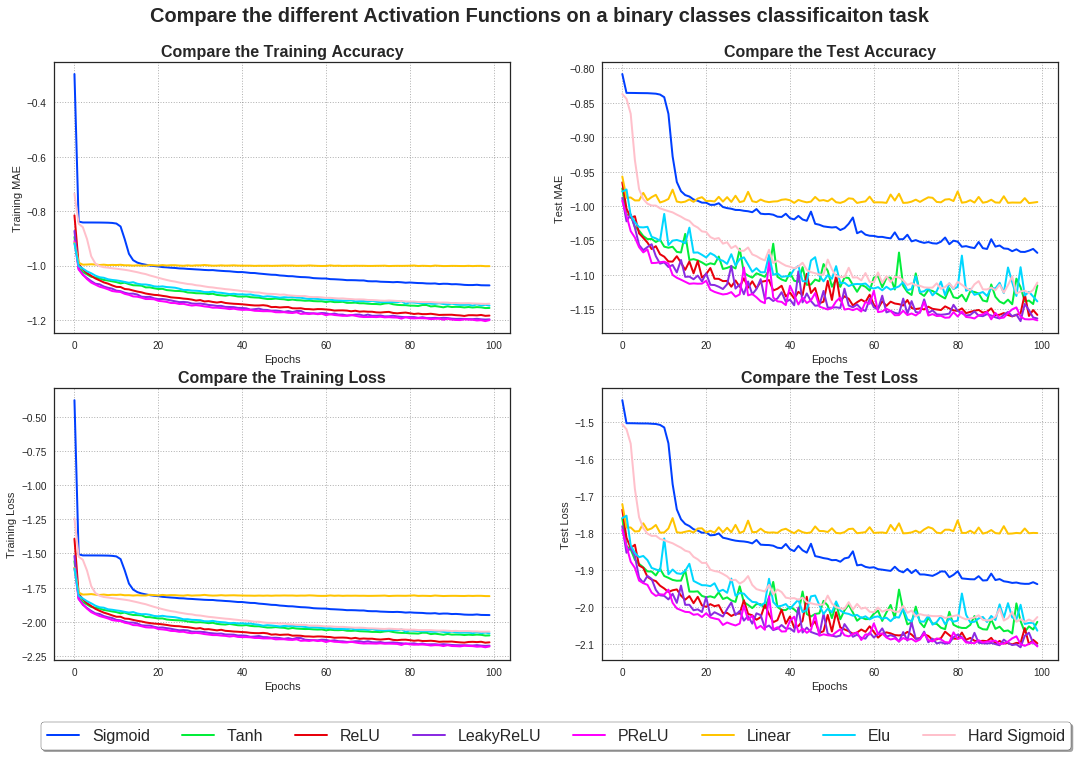

In [33]:
colors = sns.color_palette("bright", 10)
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,11))
ax1.plot(np.log10(model_1_history.history['mean_absolute_error']),color=colors[0],linewidth=2,label='Sigmoid')
ax1.plot(np.log10(model_2_history.history['mean_absolute_error']),color=colors[1],linewidth=2,label='Tanh')
ax1.plot(np.log10(model_3_history.history['mean_absolute_error']),color=colors[2],linewidth=2,label='ReLU')
ax1.plot(np.log10(model_4_history.history['mean_absolute_error']),color=colors[3],linewidth=2,label='LeakyReLU')
ax1.plot(np.log10(model_5_history.history['mean_absolute_error']),color='fuchsia',linewidth=2,label='PReLU')
ax1.plot(np.log10(model_6_history.history['mean_absolute_error']),color=colors[4],linewidth=2,label='Linear')
ax1.plot(np.log10(model_7_history.history['mean_absolute_error']),color=colors[5],linewidth=2,label='Elu')
ax1.plot(np.log10(model_8_history.history['mean_absolute_error']),color='pink',linewidth=2,label='Hard Sigmoid')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(np.log10(model_1_history.history['val_mean_absolute_error']),color=colors[0],linewidth=2,label='Sigmoid')
ax2.plot(np.log10(model_2_history.history['val_mean_absolute_error']),color=colors[1],linewidth=2,label='Tanh')
ax2.plot(np.log10(model_3_history.history['val_mean_absolute_error']),color=colors[2],linewidth=2,label='ReLU')
ax2.plot(np.log10(model_4_history.history['val_mean_absolute_error']),color=colors[3],linewidth=2,label='LeakyReLU')
ax2.plot(np.log10(model_5_history.history['val_mean_absolute_error']),color='fuchsia',linewidth=2,label='PReLU')
ax2.plot(np.log10(model_6_history.history['val_mean_absolute_error']),color=colors[4],linewidth=2,label='Linear')
ax2.plot(np.log10(model_7_history.history['val_mean_absolute_error']),color=colors[5],linewidth=2,label='Elu')
ax2.plot(np.log10(model_8_history.history['val_mean_absolute_error']),color='pink',linewidth=2,label='Hard Sigmoid')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test MAE')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(np.log10(model_1_history.history['loss']),color=colors[0],linewidth=2,label='Sigmoid')
ax3.plot(np.log10(model_2_history.history['loss']),color=colors[1],linewidth=2,label='Tanh')
ax3.plot(np.log10(model_3_history.history['loss']),color=colors[2],linewidth=2,label='ReLU')
ax3.plot(np.log10(model_4_history.history['loss']),color=colors[3],linewidth=2,label='LeakyReLU')
ax3.plot(np.log10(model_5_history.history['loss']),color='fuchsia',linewidth=2,label='PReLU')
ax3.plot(np.log10(model_6_history.history['loss']),color=colors[4],linewidth=2,label='Linear')
ax3.plot(np.log10(model_7_history.history['loss']),color=colors[5],linewidth=2,label='Elu')
ax3.plot(np.log10(model_8_history.history['loss']),color='pink',linewidth=2,label='Hard Sigmoid')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')

ax4.plot(np.log10(model_1_history.history['val_loss']),color=colors[0],linewidth=2,label='Sigmoid')
ax4.plot(np.log10(model_2_history.history['val_loss']),color=colors[1],linewidth=2,label='Tanh')
ax4.plot(np.log10(model_3_history.history['val_loss']),color=colors[2],linewidth=2,label='ReLU')
ax4.plot(np.log10(model_4_history.history['val_loss']),color=colors[3],linewidth=2,label='LeakyReLU')
ax4.plot(np.log10(model_5_history.history['val_loss']),color='fuchsia',linewidth=2,label='PReLU')
ax4.plot(np.log10(model_6_history.history['val_loss']),color=colors[4],linewidth=2,label='Linear')
ax4.plot(np.log10(model_7_history.history['val_loss']),color=colors[5],linewidth=2,label='Elu')
ax4.plot(np.log10(model_8_history.history['val_loss']),color='pink',linewidth=2,label='Hard Sigmoid')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),
          ncol=8, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=16)

fig.suptitle('Compare the different Activation Functions on a binary classes classificaiton task',fontsize=20, fontweight='bold',y=0.95)
plt.show()
